# Task B

In [1]:
from parameters import *
from functions import *
from parameters import *
from functions import *
from PDE_solutions import *

walks = 5000


False


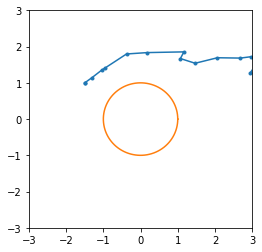

In [2]:
#np.random.seed(SEED) #scipy is based on the numpy seed
X, finalTime = RandomWalkAdaptiveTimeStep(X0)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

# MC simulation

<b>Method 1</b>: expected value control, with the possibility to choose a <b>coefficient</b> to reduce/augment the bound

In [3]:
np.random.seed(SEED) #scipy is based on the numpy seed
polluted = np.zeros(walks)


start = time.time()
for w in range(walks):
    if (w%100 == 0):
        print('Current walk: ', w )
    #diff equation
    _, IsIn = RandomWalkAdaptiveTimeStep(X0, deltaT=deltaTBoundOrder1, coeff=0.5)
    if IsIn: polluted[w] = 1
end = time.time()

confidence = 0.95
mean = polluted.mean()
std = np.std(polluted, ddof = 1)
LB, UB = CI(mean, std, walks, confidence)

print(f'\n\n\nNumber of simulations: {walks}. Time needed = {end - start}')
print(f'The estimated probability at {X0} is: {mean} (using MC), {PDEProb} (using the PDE)')
print(f'Confidence interval: [ {mean} +- {UB-mean} ]\twith P = {confidence}%')

Current walk:  0
Current walk:  100
Current walk:  200
Current walk:  300
Current walk:  400
Current walk:  500
Current walk:  600
Current walk:  700
Current walk:  800
Current walk:  900
Current walk:  1000
Current walk:  1100
Current walk:  1200
Current walk:  1300
Current walk:  1400
Current walk:  1500
Current walk:  1600
Current walk:  1700
Current walk:  1800
Current walk:  1900
Current walk:  2000
Current walk:  2100
Current walk:  2200
Current walk:  2300
Current walk:  2400
Current walk:  2500
Current walk:  2600
Current walk:  2700
Current walk:  2800
Current walk:  2900
Current walk:  3000
Current walk:  3100
Current walk:  3200
Current walk:  3300
Current walk:  3400
Current walk:  3500
Current walk:  3600
Current walk:  3700
Current walk:  3800
Current walk:  3900
Current walk:  4000
Current walk:  4100
Current walk:  4200
Current walk:  4300
Current walk:  4400
Current walk:  4500
Current walk:  4600
Current walk:  4700
Current walk:  4800
Current walk:  4900



Number of

# MonteCarloFor Different timestesp

In [4]:
AdaptiveTimeStepMonteCarlo(X0,3000, verbose=1, PDEProb=PDEProb)


Number of simulations: 3000. Time needed = 4.98 s
Estimated variance: 0.45085213182425904
The estimated probability at [-1.5, 1.0] is: 0.7163333333333334 (using MC)
Confidence interval: [ 0.7163333333333334 +- 0.016139753667916645 ]	with P = 0.95%

PDE result at [-1.5, 1.0] is:  0.7173050315908374


(0.7163333333333334, 0.45085213182425904, 0.7001935796654167, 0.73247308700125)

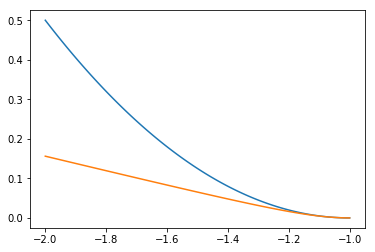

In [5]:
#plots the different time step variation on x axis
deltaT = deltaTBoundOrder2
X = np.linspace(1,2,100)
plt.plot(-X, [deltaTBoundOrder1([-x,0]) for x in X])
plt.plot(-X, [deltaTBoundOrder2([-x,0]) for x in X])

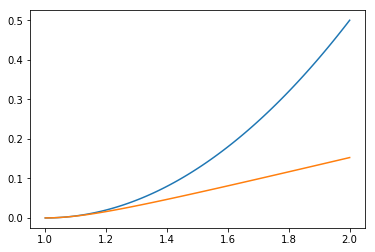

In [6]:
#plots the different time step variation on y axis
sigma = 1
deltaT = deltaTBoundOrder2
Y = np.linspace(1,2,100)
plt.plot(Y, [deltaTBoundOrder1([y,0]) for y in Y])
plt.plot(Y, [deltaTBoundOrder2([y,0]) for y in Y])

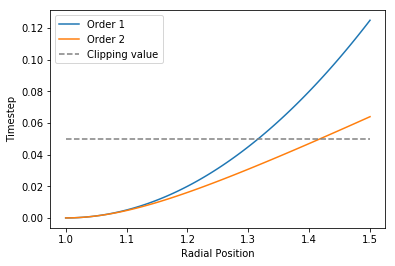

In [27]:
#plots the different time step variation on r axis
figTimestep = plt.figure()
plt.xlabel("Radial Position")
plt.ylabel("Timestep")

Radiuses = np.linspace(1,1.5,100)
r_coordinates = (Radiuses*np.sqrt(2)/2)
plt.plot(Radiuses, np.array([deltaTBoundOrder1([i,i]) for i in r_coordinates]), label= "Order 1" )
plt.plot(Radiuses, np.array([deltaTBoundOrder2([i,i]) for i in r_coordinates]), label= "Order 2" )
plt.plot(Radiuses, [0.05 for i in r_coordinates], label = "Clipping value", color = "grey",linestyle = "dashed" )

plt.legend()
figTimestep.savefig("timesteps.pdf")

False


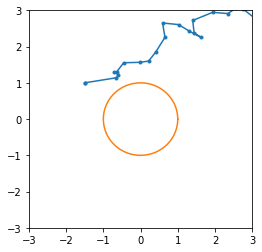

In [8]:
#np.random.seed(SEED) #scipy is based on the numpy seed
X, finalTime = RandomWalkAdaptiveTimeStep(X0, deltaTBoundOrder2, T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

# Reduction of Computation Time

In [12]:
for walks in [10,100,1000] :
    AdaptiveTimeStepMonteCarlo(X0,walks, deltaT=deltaTBoundOrder1,verbose=1)
    AdaptiveTimeStepMonteCarlo(X0,walks, deltaT=deltaTBoundOrder2,verbose=1)
    BasicMonteCarlo(X0, walks,10000, verbose=1)


Number of simulations: 10. Time needed = 0.02 s
Estimated variance: 0.31622776601683794
The estimated probability at [-1.5, 1.0] is: 0.9 (using MC)
Confidence interval: [ 0.9 +- 0.2262157162740991 ]	with P = 0.95%

Number of simulations: 10. Time needed = 0.03 s
Estimated variance: 0.42163702135578396
The estimated probability at [-1.5, 1.0] is: 0.8 (using MC)
Confidence interval: [ 0.8 +- 0.30162095503213227 ]	with P = 0.95%

Number of simulations: 10. Time needed = 3.87 s
Estimated variance: 0.5163977794943223
The estimated probability at [-1.5, 1.0] is: 0.6 (using MC)
Confidence interval: [ 0.6 +- 0.3694087177798371 ]	with P = 0.95%

Number of simulations: 100. Time needed = 0.17 s
Estimated variance: 0.44084400227680803
The estimated probability at [-1.5, 1.0] is: 0.74 (using MC)
Confidence interval: [ 0.74 +- 0.08747301422885745 ]	with P = 0.95%

Number of simulations: 100. Time needed = 0.27 s
Estimated variance: 0.4605661864718383
The estimated probability at [-1.5, 1.0] is: 0.

In [14]:
print("The order one takes only ", 1.66/305.56 *100, 0.17/29.73 *100, " % of time, and the order two take ", 2.24/305.56 *100,0.27/29.73 *100, " % of the time .")
print("Order one takes ", 1.66/2.24 *100 ,"% of the time of Order 2")

The order one takes only  0.5432648252389056 0.5718129835183318  % of time, and the order two take  0.7330802461055113 0.9081735620585267  % of the time .
Order one takes  74.10714285714285 % of the time of Order 2


# Calculation of the Confidence

In [32]:
Mean = []
Conf = []
for walks in [10 ** i for i in range(1,6)] :
    mean,_,conf,_ = AdaptiveTimeStepMonteCarlo(X0,walks, deltaT=deltaTBoundOrder1,verbose=1)
    Mean.append(mean)
    Conf.append(conf)



Number of simulations: 10. Time needed = 0.03 s
Estimated variance: 0.31622776601683794
The estimated probability at [-1.5, 1.0] is: 0.9 (using MC)
Confidence interval: [ 0.9 +- 0.2262157162740991 ]	with P = 0.95%

Number of simulations: 100. Time needed = 0.15 s
Estimated variance: 0.44084400227680803
The estimated probability at [-1.5, 1.0] is: 0.74 (using MC)
Confidence interval: [ 0.74 +- 0.08747301422885745 ]	with P = 0.95%

Number of simulations: 1000. Time needed = 1.68 s
Estimated variance: 0.4393996723622721
The estimated probability at [-1.5, 1.0] is: 0.739 (using MC)
Confidence interval: [ 0.739 +- 0.02726680853948249 ]	with P = 0.95%

Number of simulations: 10000. Time needed = 16.68 s
Estimated variance: 0.45766689403821853
The estimated probability at [-1.5, 1.0] is: 0.7014 (using MC)
Confidence interval: [ 0.7014 +- 0.008971192240113779 ]	with P = 0.95%

Number of simulations: 100000. Time needed = 163.78 s
Estimated variance: 0.45594608285224325
The estimated probabili

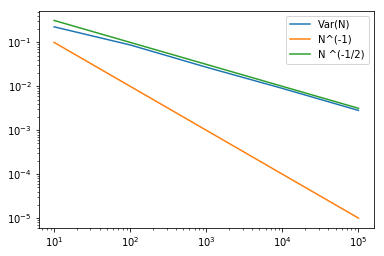

In [47]:
X_axis = np.array([10 ** i for i in range(1,6)])
plt.plot(X_axis, -(np.array(Conf)-np.array(Mean)), label= "Var(N)")
plt.plot(X_axis, 1/X_axis, label= "N^(-1)")
plt.plot(X_axis, 1/np.sqrt(X_axis), label= "N ^(-1/2)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()
